# Synthetic Data Generation

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Regression problem generation

In [2]:
from sklearn.datasets import make_regression

In [3]:
data1 = make_regression(n_samples=20, n_features=4, n_informative=2, n_targets=1, 
                        bias=0.0, effective_rank=None,tail_strength=0.5, 
                        noise=0.0, shuffle=True, coef=False, random_state=None)
df1 = pd.DataFrame(data1[0],columns=['x'+str(i) for i in range(1,5)])
df1['y'] = data1[1]

In [4]:
df1.head()

,x1,x2,x3,x4,y
0,0.838064,0.079599,-0.092742,1.254009,135.442681
1,0.568419,0.760923,-0.769933,-0.790223,-45.813264
2,0.692084,-0.493769,0.206512,0.550692,71.163141
3,0.607550,-1.449636,0.822219,1.995158,189.321754
4,0.200813,-1.737370,1.185276,-0.561152,-39.846264


### Plot

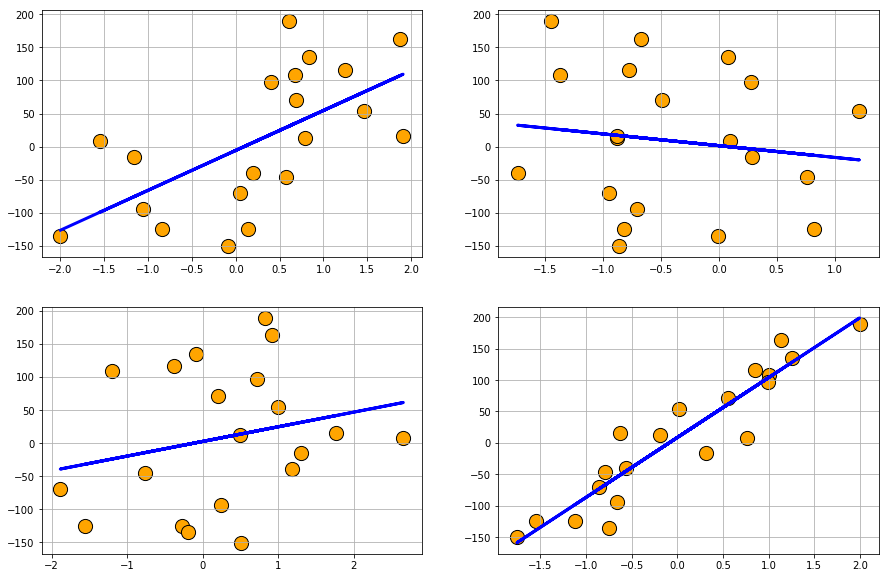

In [5]:
plt.figure(figsize=(15,10))
for i in range(1,5):
    fit = np.polyfit(df1[df1.columns[i-1]],df1['y'],1)
    fit_fn = np.poly1d(fit)
    plt.subplot(2,2,i)
    plt.scatter(df1[df1.columns[i-1]],df1['y'],s=200,c='orange',edgecolor='k')
    plt.plot(df1[df1.columns[i-1]],fit_fn(df1[df1.columns[i-1]]),'b-',lw=3)
    plt.grid(True)

### Data with Gaussian noise

In [12]:
data2 = make_regression(n_samples=20, n_features=4, n_informative=2, n_targets=1, 
                        bias=0.0, effective_rank=None,tail_strength=0.5, 
                        noise=2.0, shuffle=True, coef=False, random_state=None)
df2 = pd.DataFrame(data2[0],columns=['x'+str(i) for i in range(1,5)])
df2['y'] = data2[1]

### Plot

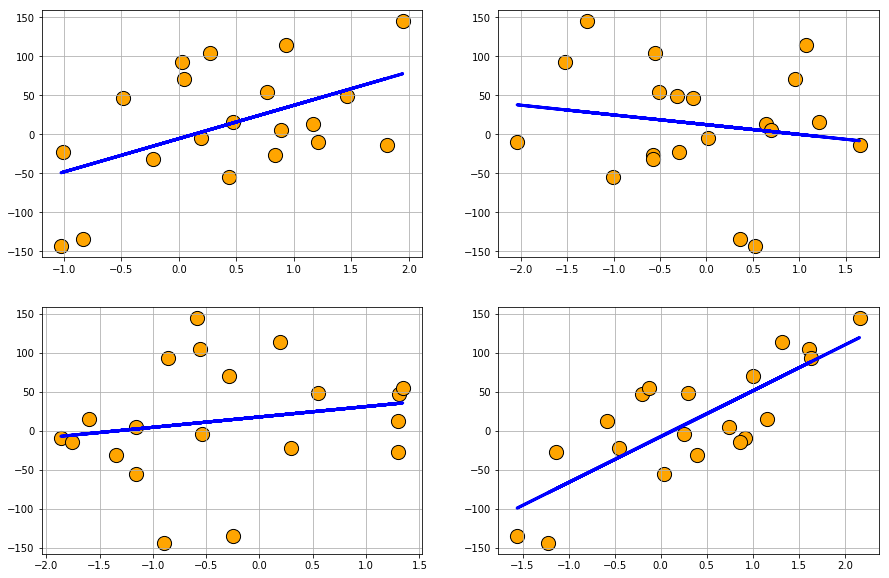

In [13]:
plt.figure(figsize=(15,10))
for i in range(1,5):
    fit = np.polyfit(df2[df2.columns[i-1]],df2['y'],1)
    fit_fn = np.poly1d(fit)
    plt.subplot(2,2,i)
    plt.scatter(df2[df2.columns[i-1]],df2['y'],s=200,c='orange',edgecolor='k')
    plt.plot(df2[df2.columns[i-1]],fit_fn(df2[df2.columns[i-1]]),'b-',lw=3)
    plt.grid(True)

### Plot datasets with varying degree of noise

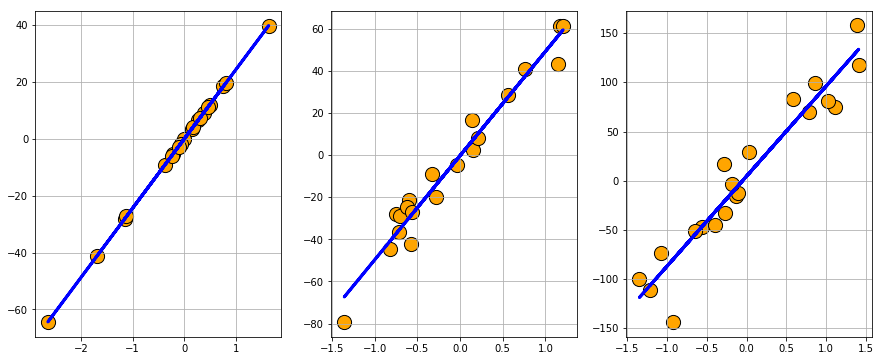

In [32]:
plt.figure(figsize=(15,6))
df2 = pd.DataFrame(data=np.zeros((20,1)))
for i in range(3):
    data2 = make_regression(n_samples=20, n_features=1, n_informative=1, n_targets=1, 
                        bias=0.0, effective_rank=None,tail_strength=0.5, 
                        noise=i*10, shuffle=True, coef=False, random_state=None)
    df2['x'+str(i+1)]=data2[0]
    df2['y'+str(i+1)] = data2[1]

for i in range(3):
    fit = np.polyfit(df2['x'+str(i+1)],df2['y'+str(i+1)],1)
    fit_fn = np.poly1d(fit)
    plt.subplot(1,3,i+1)
    plt.scatter(df2['x'+str(i+1)],df2['y'+str(i+1)],s=200,c='orange',edgecolor='k')
    plt.plot(df2['x'+str(i+1)],fit_fn(df2['x'+str(i+1)]),'b-',lw=3)
    plt.grid(True)

## Classification problem generation

In [8]:
from sklearn.datasets import make_classification

In [9]:
data3 = make_classification(n_samples=20, n_features=4, n_informative=4, n_redundant=0, n_repeated=0, 
                            n_classes=2, n_clusters_per_class=1, weights=None, flip_y=0.01, class_sep=1.0, 
                            hypercube=True, shift=0.0, scale=1.0, shuffle=True, random_state=None)
df3 = pd.DataFrame(data3[0],columns=['x'+str(i) for i in range(1,5)])
df3['y'] = data3[1]

In [10]:
df3.head()

,x1,x2,x3,x4,y
0,-2.332457,0.601359,0.396655,-0.353089,1
1,-1.967739,-0.743628,2.050389,1.344484,1
2,-0.559065,2.477438,-1.399324,1.682143,0
3,-1.693042,-0.023711,1.080509,0.485027,1
4,-0.946488,1.548619,-2.464539,0.976401,0


### Plot

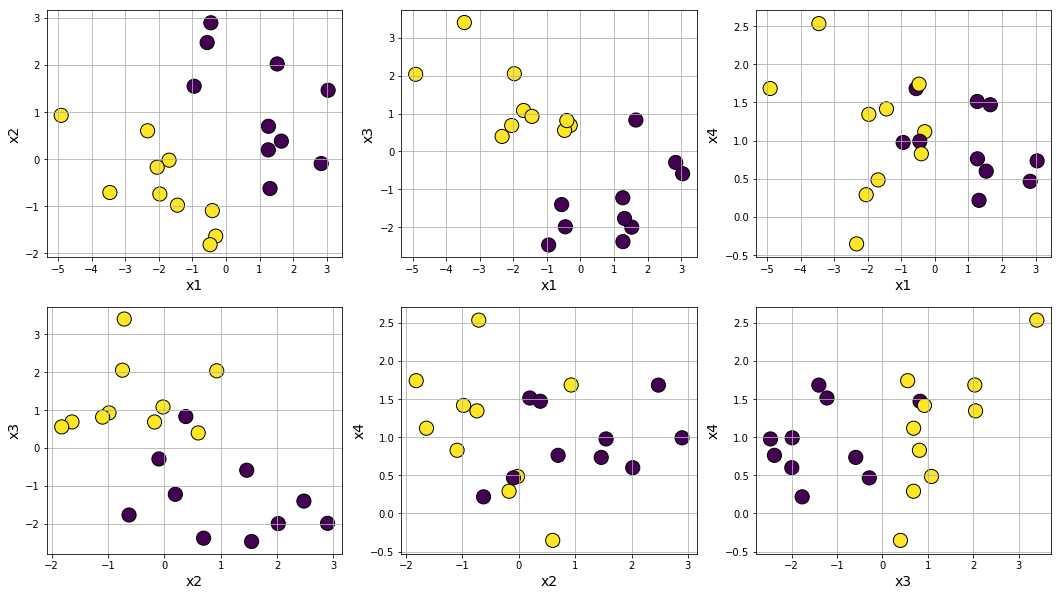

In [11]:
from itertools import combinations
from math import ceil
lst_var=list(combinations(df3.columns[:-1],2))
len_var = len(lst_var)
plt.figure(figsize=(18,10))
for i in range(1,len_var+1):
    plt.subplot(2,ceil(len_var/2),i)
    var1 = lst_var[i-1][0]
    var2 = lst_var[i-1][1]
    plt.scatter(df3[var1],df3[var2],s=200,c=df3['y'],edgecolor='k')
    plt.xlabel(var1,fontsize=14)
    plt.ylabel(var2,fontsize=14)
    plt.grid(True)

### Making class separation easy by tweaking `class_sep`

In [102]:
data3 = make_classification(n_samples=20, n_features=4, n_informative=4, n_redundant=0, n_repeated=0, 
                            n_classes=2, n_clusters_per_class=1, weights=None, flip_y=0.01, class_sep=3.0, 
                            hypercube=True, shift=0.0, scale=1.0, shuffle=True, random_state=None)
df3 = pd.DataFrame(data3[0],columns=['x'+str(i) for i in range(1,5)])
df3['y'] = data3[1]

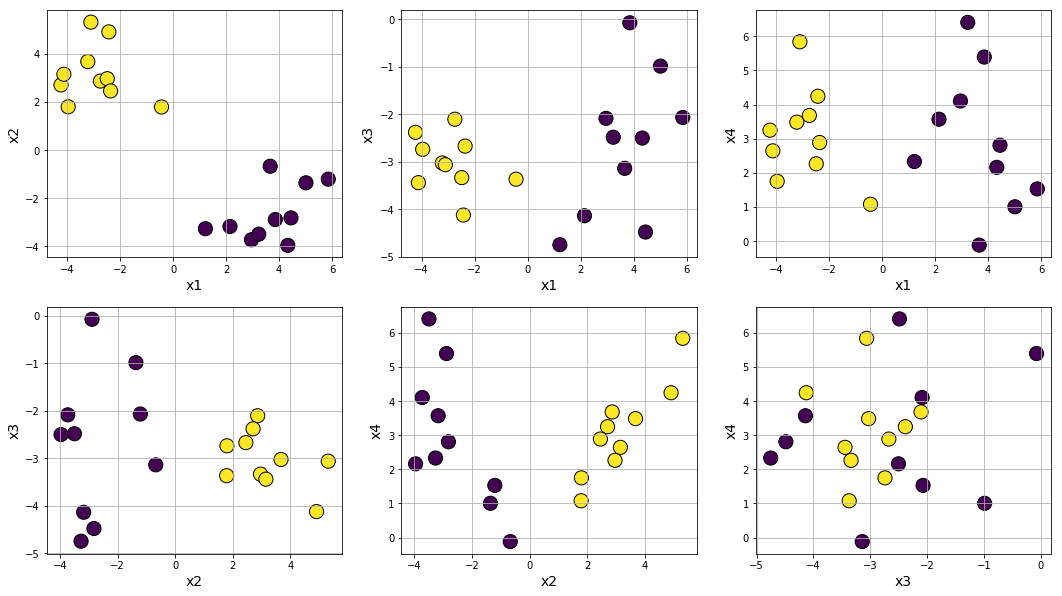

In [103]:
from itertools import combinations
from math import ceil
lst_var=list(combinations(df3.columns[:-1],2))
len_var = len(lst_var)
plt.figure(figsize=(18,10))
for i in range(1,len_var+1):
    plt.subplot(2,ceil(len_var/2),i)
    var1 = lst_var[i-1][0]
    var2 = lst_var[i-1][1]
    plt.scatter(df3[var1],df3[var2],s=200,c=df3['y'],edgecolor='k')
    plt.xlabel(var1,fontsize=14)
    plt.ylabel(var2,fontsize=14)
    plt.grid(True)

### Making class separation hard by tweaking `class_sep`

In [107]:
data3 = make_classification(n_samples=20, n_features=4, n_informative=4, n_redundant=0, n_repeated=0, 
                            n_classes=2, n_clusters_per_class=1, weights=None, flip_y=0.01, class_sep=0.5, 
                            hypercube=True, shift=0.0, scale=1.0, shuffle=True, random_state=None)
df3 = pd.DataFrame(data3[0],columns=['x'+str(i) for i in range(1,5)])
df3['y'] = data3[1]

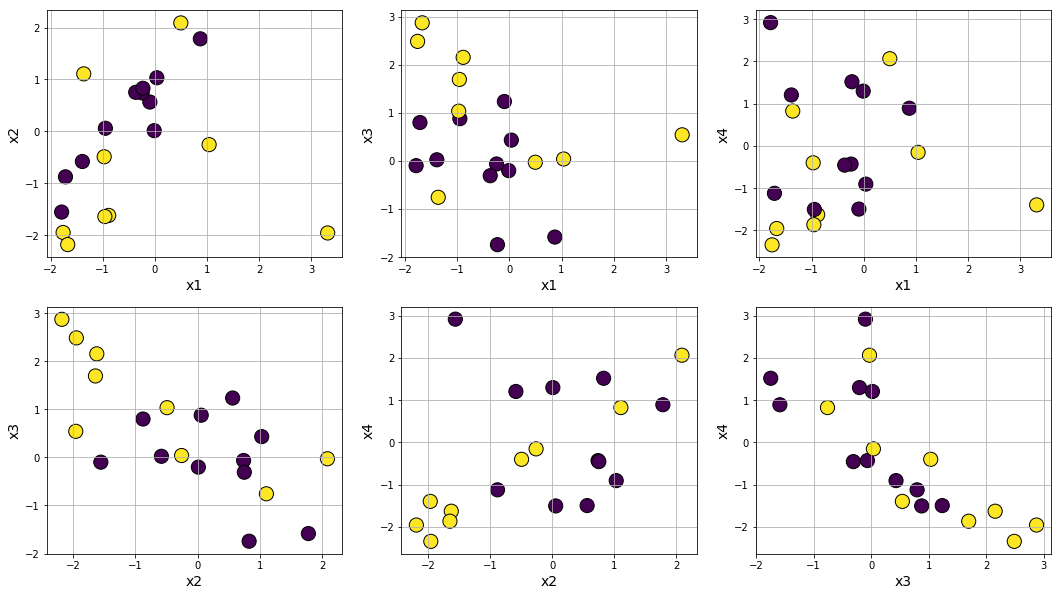

In [108]:
from itertools import combinations
from math import ceil
lst_var=list(combinations(df3.columns[:-1],2))
len_var = len(lst_var)
plt.figure(figsize=(18,10))
for i in range(1,len_var+1):
    plt.subplot(2,ceil(len_var/2),i)
    var1 = lst_var[i-1][0]
    var2 = lst_var[i-1][1]
    plt.scatter(df3[var1],df3[var2],s=200,c=df3['y'],edgecolor='k')
    plt.xlabel(var1,fontsize=14)
    plt.ylabel(var2,fontsize=14)
    plt.grid(True)

### Making data noisy by increasing `flip_y`

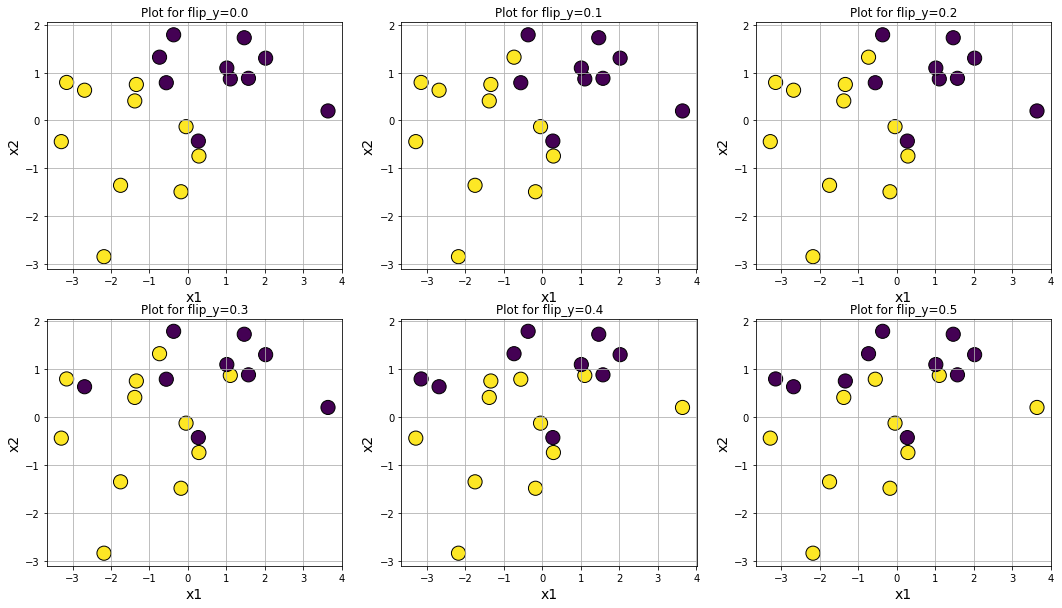

In [140]:
plt.figure(figsize=(18,10))
for i in range(6):
    data3 = make_classification(n_samples=20, n_features=4, n_informative=4, n_redundant=0, n_repeated=0, 
                                n_classes=2, n_clusters_per_class=1, weights=None, flip_y=0.1*i, class_sep=1.0, 
                                hypercube=True, shift=0.0, scale=1.0, shuffle=False, random_state=101)
    df3 = pd.DataFrame(data3[0],columns=['x'+str(i) for i in range(1,5)])
    df3['y'] = data3[1]
    plt.subplot(2,3,i+1)
    plt.title(f"Plot for flip_y={round(0.1*i,2)}")
    plt.scatter(df3['x1'],df3['x2'],s=200,c=df3['y'],edgecolor='k')
    plt.xlabel('x1',fontsize=14)
    plt.ylabel('x2',fontsize=14)
    plt.grid(True)

### Plot datasets with varying degree of class separation

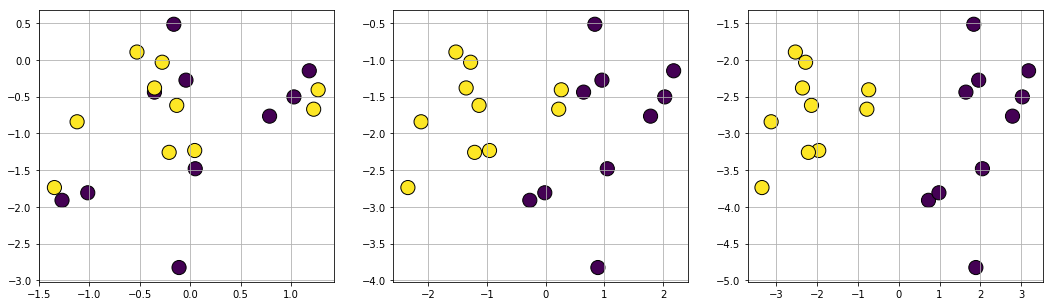

In [52]:
plt.figure(figsize=(18,5))
df2 = pd.DataFrame(data=np.zeros((20,1)))
for i in range(3):
    data2 = make_classification(n_samples=20, n_features=2, n_informative=2, n_redundant=0, n_repeated=0, 
                                n_classes=2, n_clusters_per_class=1, weights=None, flip_y=0, class_sep=i+0.5, 
                                hypercube=True, shift=0.0, scale=1.0, shuffle=False, random_state=101)
    df2['x'+str(i+1)+'1']=data2[0][:,0]
    df2['x'+str(i+1)+'2']=data2[0][:,1]
    df2['y'+str(i+1)] = data2[1]

for i in range(3):
    plt.subplot(1,3,i+1)
    plt.scatter(df2['x'+str(i+1)+'1'],df2['x'+str(i+1)+'2'],s=200,c=df2['y'+str(i+1)],edgecolor='k')
    plt.grid(True)

## Clustering problem generation

In [127]:
from sklearn.datasets import make_blobs

In [137]:
data4 = make_blobs(n_samples=60, n_features=4, centers=3, cluster_std=1.0, 
                   center_box=(-5.0, 5.0), shuffle=True, random_state=None)
df4 = pd.DataFrame(data4[0],columns=['x'+str(i) for i in range(1,5)])
df4['y'] = data4[1]

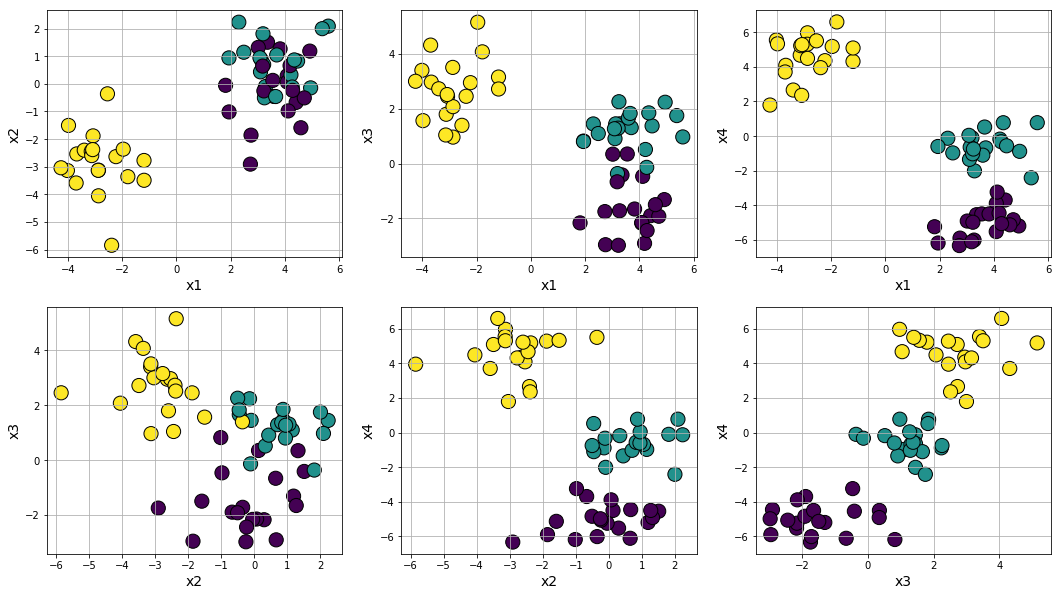

In [141]:
from itertools import combinations
from math import ceil
lst_var=list(combinations(df4.columns[:-1],2))
len_var = len(lst_var)
plt.figure(figsize=(18,10))
for i in range(1,len_var+1):
    plt.subplot(2,ceil(len_var/2),i)
    var1 = lst_var[i-1][0]
    var2 = lst_var[i-1][1]
    plt.scatter(df4[var1],df4[var2],s=200,c=df4['y'],edgecolor='k')
    plt.xlabel(var1,fontsize=14)
    plt.ylabel(var2,fontsize=14)
    plt.grid(True)

### Making clusters compact and easily separable by tweaking `cluster_std`

In [146]:
data4 = make_blobs(n_samples=60, n_features=4, centers=3, cluster_std=0.3, 
                   center_box=(-5.0, 5.0), shuffle=True, random_state=None)
df4 = pd.DataFrame(data4[0],columns=['x'+str(i) for i in range(1,5)])
df4['y'] = data4[1]

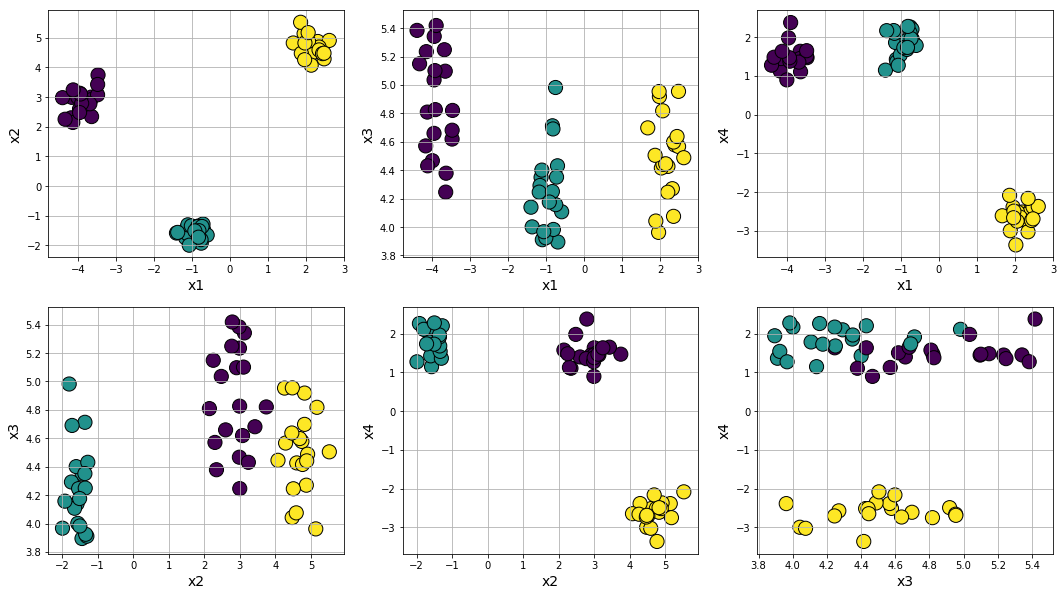

In [147]:
from itertools import combinations
from math import ceil
lst_var=list(combinations(df4.columns[:-1],2))
len_var = len(lst_var)
plt.figure(figsize=(18,10))
for i in range(1,len_var+1):
    plt.subplot(2,ceil(len_var/2),i)
    var1 = lst_var[i-1][0]
    var2 = lst_var[i-1][1]
    plt.scatter(df4[var1],df4[var2],s=200,c=df4['y'],edgecolor='k')
    plt.xlabel(var1,fontsize=14)
    plt.ylabel(var2,fontsize=14)
    plt.grid(True)

### Making clusters spread out and difficult to separate by tweaking `cluster_std`

In [148]:
data4 = make_blobs(n_samples=60, n_features=4, centers=3, cluster_std=2.5, 
                   center_box=(-5.0, 5.0), shuffle=True, random_state=None)
df4 = pd.DataFrame(data4[0],columns=['x'+str(i) for i in range(1,5)])
df4['y'] = data4[1]

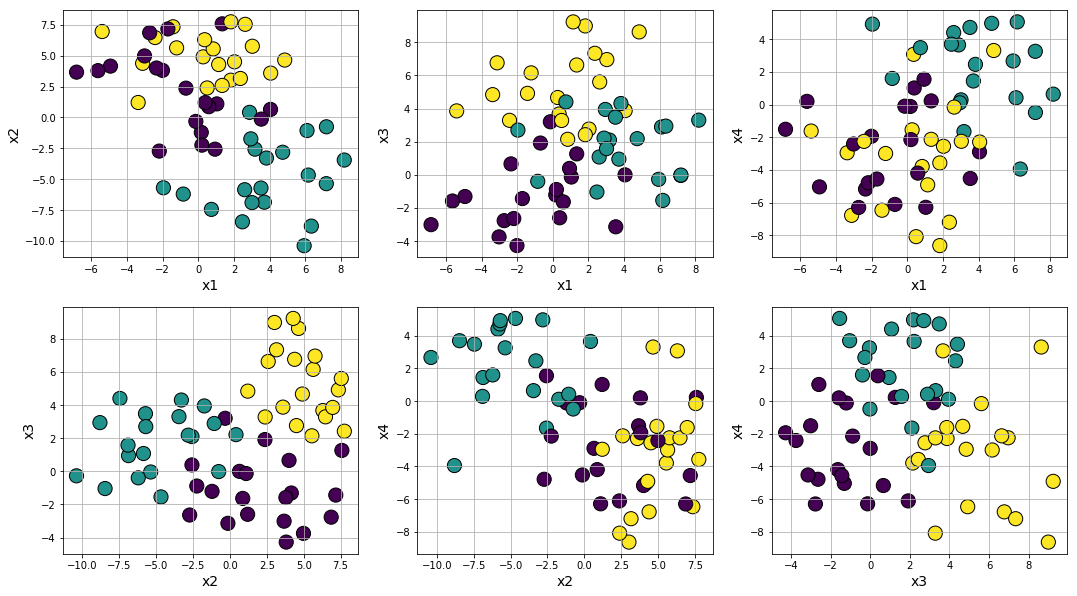

In [149]:
from itertools import combinations
from math import ceil
lst_var=list(combinations(df4.columns[:-1],2))
len_var = len(lst_var)
plt.figure(figsize=(18,10))
for i in range(1,len_var+1):
    plt.subplot(2,ceil(len_var/2),i)
    var1 = lst_var[i-1][0]
    var2 = lst_var[i-1][1]
    plt.scatter(df4[var1],df4[var2],s=200,c=df4['y'],edgecolor='k')
    plt.xlabel(var1,fontsize=14)
    plt.ylabel(var2,fontsize=14)
    plt.grid(True)

### Making anisotropically distributed clustering problem

In [212]:
data5 = make_blobs(n_samples=50, n_features=2, centers=3,cluster_std=1.5)

In [216]:
transformation = [[0.5, -0.5], [-0.4, 0.8]]

In [217]:
data5_0=np.dot(data5[0],transformation)
df5 = pd.DataFrame(data5_0,columns=['x'+str(i) for i in range(1,3)])
df5['y'] = data5[1]

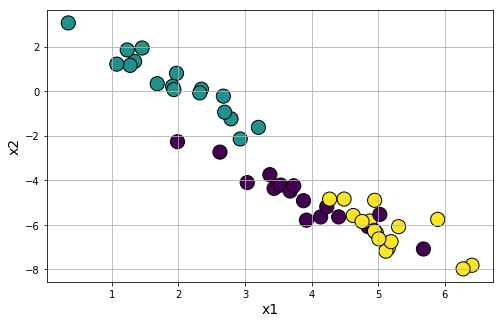

In [218]:
plt.figure(figsize=(8,5))
plt.scatter(df5['x1'],df5['x2'],c=df5['y'],s=200,edgecolors='k')
plt.xlabel('x1',fontsize=14)
plt.ylabel('x2',fontsize=14)
plt.grid(True)
plt.show()

### Making concentric circle clusters

In [219]:
from sklearn.datasets import make_circles

In [230]:
data6 = make_circles(n_samples=50, shuffle=True, noise=None, random_state=None, factor=0.6)
df6 = pd.DataFrame(data6[0],columns=['x'+str(i) for i in range(1,3)])
df6['y'] = data6[1]

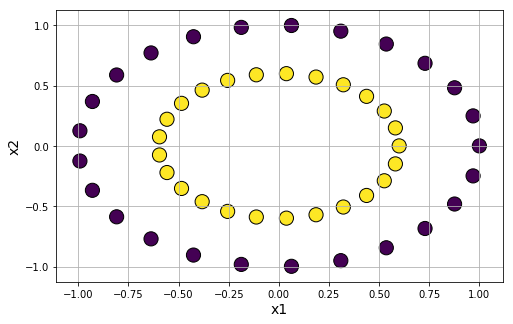

In [231]:
plt.figure(figsize=(8,5))
plt.scatter(df6['x1'],df6['x2'],c=df6['y'],s=200,edgecolors='k')
plt.xlabel('x1',fontsize=14)
plt.ylabel('x2',fontsize=14)
plt.grid(True)
plt.show()

### Introdue noise in the circle clusters

In [232]:
data6 = make_circles(n_samples=50, shuffle=True, noise=0.15, random_state=None, factor=0.6)
df6 = pd.DataFrame(data6[0],columns=['x'+str(i) for i in range(1,3)])
df6['y'] = data6[1]

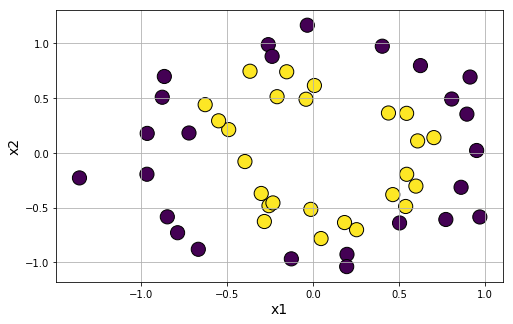

In [233]:
plt.figure(figsize=(8,5))
plt.scatter(df6['x1'],df6['x2'],c=df6['y'],s=200,edgecolors='k')
plt.xlabel('x1',fontsize=14)
plt.ylabel('x2',fontsize=14)
plt.grid(True)
plt.show()

### Make moon shape clusters

In [234]:
from sklearn.datasets import make_moons

In [239]:
data7 = make_moons(n_samples=50, shuffle=True, noise=None, random_state=None)
df7 = pd.DataFrame(data7[0],columns=['x'+str(i) for i in range(1,3)])
df7['y'] = data7[1]

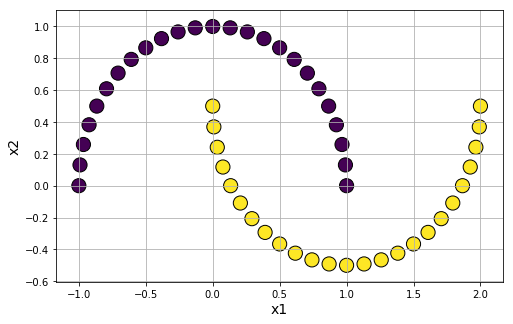

In [240]:
plt.figure(figsize=(8,5))
plt.scatter(df7['x1'],df7['x2'],c=df7['y'],s=200,edgecolors='k')
plt.xlabel('x1',fontsize=14)
plt.ylabel('x2',fontsize=14)
plt.grid(True)
plt.show()

### Introduce noise in the moon-shaped clusters

In [243]:
data7 = make_moons(n_samples=50, shuffle=True, noise=0.1, random_state=None)
df7 = pd.DataFrame(data7[0],columns=['x'+str(i) for i in range(1,3)])
df7['y'] = data7[1]

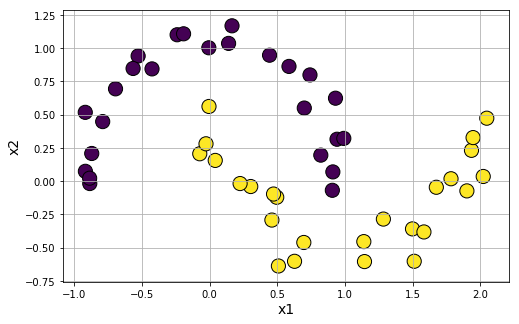

In [244]:
plt.figure(figsize=(8,5))
plt.scatter(df7['x1'],df7['x2'],c=df7['y'],s=200,edgecolors='k')
plt.xlabel('x1',fontsize=14)
plt.ylabel('x2',fontsize=14)
plt.grid(True)
plt.show()